In [1]:
import numpy as np
import matplotlib.pyplot as plt
def correlation(x, y):
    x = np.fft.fft(x)
    y = np.fft.fft(y)
    cor = []
    for i in range(len(x)):
        cor.append(x[i]*np.conj(y[i])/len(x))
    cor = np.fft.ifft(cor)
    return cor.real
def velocity(x, time_interval):
    v = []
    for i in range(len(x)-2):
        v.append((x[i+2]-x[i])/(2*time_interval))
    return v


def acceleration(x, t):
    a = []
    for i in range(len(x)-2):
        a.append((x[i]+x[i+2]-2*x[i+1])/t**2)
    return a

def potential(x):
    U0 = 3
    return U0*(4*np.power(x, 3)-4*x)

In [2]:
traj = np.loadtxt("trajectory.txt")

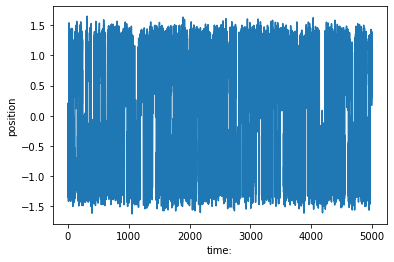

<Figure size 432x288 with 0 Axes>

In [3]:
plt.plot(traj[:, 0], traj[:, 1]);
plt.xlabel("time:");
plt.ylabel("position");
plt.show()
plt.clf()

In [4]:
time_interval = 0.0001
traj = traj[:, 1]
v = velocity(traj, time_interval)

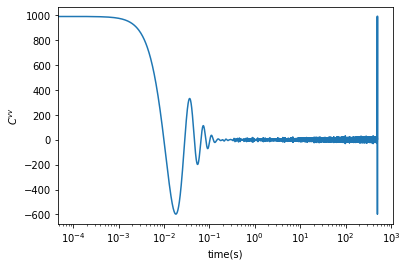

<Figure size 432x288 with 0 Axes>

In [5]:
t = [i*time_interval for i in range(len(v))]
corvv = correlation(v,v)
plt.plot(t,corvv)
plt.xscale("log")
plt.xlabel("time(s)")
plt.ylabel(r"$C^{vv}$")
plt.show()
plt.clf()

In [6]:
print(corvv[1])

991.3646290570798


In [7]:
#clear the memory
v = 0

In [8]:
g_p = potential(traj)
corux = correlation(g_p, traj)
#clear the memory
g_p = 0
traj = 0

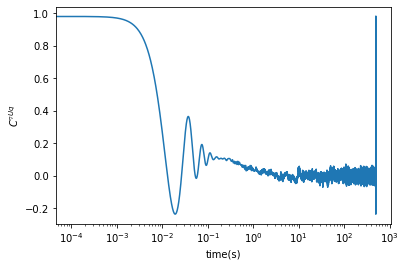

<Figure size 432x288 with 0 Axes>

In [9]:
t = [i*time_interval for i in range(len(corux))]
plt.plot(t, corux)
plt.xlabel("time(s)")
plt.ylabel(r"$C^{\triangledown U q}$")
plt.xscale("log")
plt.show()
plt.clf()

In [10]:
#clear the memory
g_p = 0
traj = 0

-0.0030160647111923044


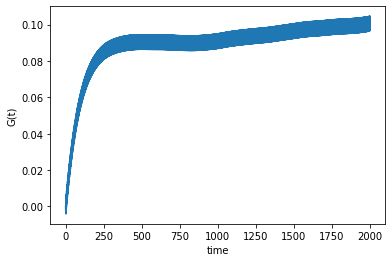

<Figure size 432x288 with 0 Axes>

In [11]:
G = []
G.append(0)
g1 = 2/(time_interval*corvv[0])*(corux[1+1]-corux[0+1]/corvv[0]*corvv[1])
print(g1)
G.append(g1)
tempsum = 0
temp = 0
for i in range(2, 2000):
    tempsum = 0
    for j in range(1,i-1):
        tempsum = tempsum + G[i-j]*corvv[j]
    temp = 2/(time_interval*corvv[0])*(corux[i+1]-corux[0+1]/corvv[0]*corvv[i] - time_interval*tempsum)
    G.append(temp)

plt.plot(G)
plt.xlabel("time")
plt.ylabel("G(t)")
plt.show()
plt.clf()
    

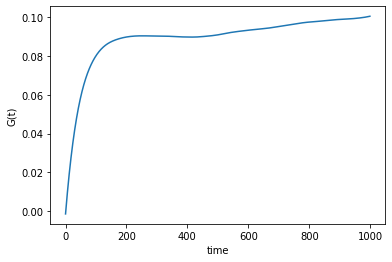

<Figure size 432x288 with 0 Axes>

In [12]:
G_smooth = []
for i in range(int(len(G)/2)):
    G_smooth.append(1/2*(G[2*i]+G[2*i+1]))

plt.plot(G_smooth)
plt.xlabel("time")
plt.ylabel("G(t)")
plt.show()
plt.clf()

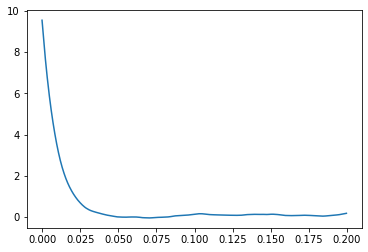

<Figure size 432x288 with 0 Axes>

In [13]:
gamma = []
for i in range(len(G_smooth)-1):
    gamma.append((G_smooth[i+1]-G_smooth[i])/time_interval/2)
t = [2*i*time_interval for i in range(len(gamma))]
plt.plot(t, gamma)
plt.show()
plt.clf()
    

In [2]:
from lmfit import Model

ModuleNotFoundError: No module named 'lmfit'

In [ ]:
def func(x, a, b):
    return b*np.exp(x*a)

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 8000
    # variables        = 2
    chi-square         = 4.85131125
    reduced chi-square = 6.0657e-04
    Akaike info crit   = -59259.5823
    Bayesian info crit = -59245.6079
[[Variables]]
    a: -2.25516434 +/- 0.00186099 (0.08%) (init = -0.04)
    b:  1.82836676 +/- 0.00105352 (0.06%) (init = 0.4)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.712


Text(0, 0.5, 'Memory kernel')

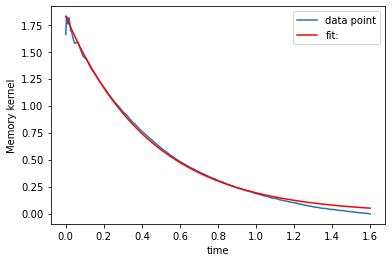

In [ ]:
t = [2*i*time_interval for i in range(len(gamma))]
model = Model(func)
import matplotlib.pyplot as plt
params = model.make_params(a=-0.04, b = 0.4)
#params['a'].min = -2
#params['b'].max = 0.00030
result = model.fit(gamma[:8000], params, x = t[:8000])
print(result.fit_report())
plt.plot(t[:8000], gamma[:8000], label = 'data point')
plt.plot(t[:8000], result.best_fit, 'r', label = 'fit:')
plt.legend()
plt.xlabel("time")
plt.ylabel(r"Memory kernel")